In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import pickle

In [2]:
# convert csv to dataframe
df=pd.read_csv("combined_df.csv")
df

,it,ft,bt,transmission,ownerNo,oem,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,Seats_1,Color,Gear Box,Drive Type,City
0,0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,₹ 4 Lakh,Third Party insurance,"1,20,000 Kms",23.1 kmpl,998 CC,5.0,White,5 Speed,FWD,Bangalore
1,0,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,₹ 8.11 Lakh,Comprehensive,"32,706 Kms",17 kmpl,1497 CC,5.0,White,5 Speed,FWD,Bangalore
2,0,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,₹ 5.85 Lakh,Comprehensive,"11,949 Kms",23.84 kmpl,1199 CC,5.0,Red,5 Speed,FWD,Bangalore
3,0,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,₹ 4.62 Lakh,Comprehensive,"17,794 Kms",19.1 kmpl,1197 CC,5.0,Others,5 Speed,FWD,Bangalore
4,0,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,₹ 7.90 Lakh,Third Party insurance,"60,000 Kms",23.65 kmpl,1248 CC,5.0,Gray,5 Speed,FWD,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,Manual,1,Maruti,Maruti Celerio,2022,₹ 5.10 Lakh,Third Party insurance,"10,000 Kms",25.24 kmpl,998 CC,5.0,Others,5-Speed,NaN,Kolkata
8365,0,Petrol,Hatchback,Manual,1,Maruti,Maruti Alto 800,2014,₹ 1.80 Lakh,Third Party insurance,"1,20,000 Kms",22.74 kmpl,796 CC,5.0,Others,5 Speed,FWD,Kolkata
8366,0,Petrol,Sedan,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,₹ 5.50 Lakh,Third Party insurance,"50,000 Kms",11.74 kmpl,1796 CC,5.0,Others,7 Speed,RWD,Kolkata
8367,0,Petrol,Hatchback,Manual,1,Maruti,Maruti Ritz,2012,₹ 1.40 Lakh,Third Party insurance,"40,000 Kms",18.5 kmpl,1197 CC,5.0,Others,5 Speed,FWD,Kolkata


In [3]:
df.shape

(8369, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   it                  8369 non-null   int64  
 1   ft                  8369 non-null   object 
 2   bt                  8365 non-null   object 
 3   transmission        8369 non-null   object 
 4   ownerNo             8369 non-null   int64  
 5   oem                 8369 non-null   object 
 6   model               8369 non-null   object 
 7   modelYear           8369 non-null   int64  
 8   price               8369 non-null   object 
 9   Insurance Validity  8365 non-null   object 
 10  Kms Driven          8367 non-null   object 
 11  Mileage             8082 non-null   object 
 12  Engine              8365 non-null   object 
 13  Seats_1             8363 non-null   float64
 14  Color               8366 non-null   object 
 15  Gear Box            5689 non-null   object 
 16  Drive 

In [5]:
# statistical view of the numerical data 
df.describe()

,it,ownerNo,modelYear,Seats_1
count,8369.0,8369.000000,8369.000000,8363.000000
mean,0.0,1.360139,2016.503286,5.203276
std,0.0,0.641958,3.921465,0.663789
min,0.0,0.000000,1985.000000,2.000000
25%,0.0,1.000000,2014.000000,5.000000
50%,0.0,1.000000,2017.000000,5.000000
75%,0.0,2.000000,2019.000000,5.000000
max,0.0,5.000000,2023.000000,10.000000


In [6]:
# count of missing values
df.isnull().sum()

it                       0
ft                       0
bt                       4
transmission             0
ownerNo                  0
oem                      0
model                    0
modelYear                0
price                    0
Insurance Validity       4
Kms Driven               2
Mileage                287
Engine                   4
Seats_1                  6
Color                    3
Gear Box              2680
Drive Type            3714
City                     0
dtype: int64

### Handling Missing Values

In [7]:
# drop columns from the dataframe
df.drop(columns=["it","Gear Box","Drive Type"],inplace=True,axis=1)
df.reset_index(drop=True, inplace=True)

In [8]:
# body type unique values
df["bt"].unique()

array(['Hatchback', 'SUV', 'Sedan', 'MUV', 'Coupe', 'Minivans',
       'Pickup Trucks', 'Convertibles', 'Hybrids', nan, 'Wagon'],
      dtype=object)

In [9]:
# retriving nan values from the column bt (body type)
df[pd.isna(df["bt"])]

,ft,bt,transmission,ownerNo,oem,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,Seats_1,Color,City
3382,Petrol,NaN,Automatic,1,Toyota,Toyota Vellfire,2023,₹ 1.19 Crore,Comprehensive,"10,500 Kms",NaN,2487 CC,7.0,White,Delhi
5390,Petrol,NaN,Manual,1,Maruti,Maruti Eeco,2019,₹ 4.95 Lakh,Comprehensive,"13,500 Kms",19.71 kmpl,1197 CC,5.0,Silver,Hyderabad
5411,Petrol,NaN,Manual,1,Maruti,Maruti Eeco,2020,₹ 5.20 Lakh,Comprehensive,"16,415 Kms",19.71 kmpl,1197 CC,5.0,Grey,Hyderabad
8114,Petrol,NaN,Manual,1,Maruti,Maruti Eeco,2019,₹ 3.95 Lakh,Comprehensive,"21,166 Kms",19.71 kmpl,1197 CC,5.0,Blue,Kolkata


In [10]:
# replacing the nan values (by checking at car dekho website)
df.loc[df['model']=='Toyota Vellfire','bt'] = 'MUV'
df.loc[df['model']=='Maruti Eeco','bt'] = 'Minivans'

In [11]:
# retrive seats nan values
df[pd.isna(df["Seats_1"])]

,ft,bt,transmission,ownerNo,oem,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,Seats_1,Color,City
1175,Petrol,Hatchback,Manual,3,Maruti,Maruti Estilo,2009,₹ 2 Lakh,Third Party insurance,"40,000 Kms",19.5 kmpl,1061 CC,NaN,Others,Bangalore
3528,Petrol,SUV,Manual,2,Nissan,Nissan Kicks,2019,₹ 7 Lakh,Third Party insurance,"60,000 Kms",NaN,1498 CC,NaN,Gray,Delhi
6211,Diesel,SUV,Manual,2,Ford,Ford Endeavour,2008,₹ 3.90 Lakh,Third Party insurance,"1,20,000 Kms",11.4 kmpl,2953 CC,NaN,Black,Jaipur
7608,Petrol,Hatchback,Manual,2,Maruti,Maruti Estilo,2010,₹ 1.20 Lakh,Third Party insurance,"70,000 Kms",19.5 kmpl,1061 CC,NaN,Others,Kolkata
7669,Petrol,Hatchback,Manual,2,Maruti,Maruti Estilo,2009,₹ 1.20 Lakh,Third Party insurance,"50,000 Kms",19.5 kmpl,1061 CC,NaN,Gold,Kolkata
7745,Diesel,Sedan,Manual,1,Hindustan Motors,Ambassador,2014,₹ 1.20 Lakh,Third Party insurance,"1,20,000 Kms",12.8 kmpl,1995 CC,NaN,Yellow,Kolkata


In [12]:
# replace nan values of seats
df.loc[df['model']=='Maruti Estilo','Seats_1'] = 5.0
df.loc[df['model']=='Nissan Kicks','Seats_1'] = 5.0
df.loc[df['model']=='Ford Endeavour','Seats_1'] = 7.0
df.loc[df['model']=='Ambassador','Seats_1'] = 5.0

In [13]:
# drop nan values
df.dropna(subset=["Insurance Validity","Kms Driven","Color","Engine"],inplace=True)

In [14]:
# count of missing values
df.isnull().sum()

ft                      0
bt                      0
transmission            0
ownerNo                 0
oem                     0
model                   0
modelYear               0
price                   0
Insurance Validity      0
Kms Driven              0
Mileage               284
Engine                  0
Seats_1                 0
Color                   0
City                    0
dtype: int64

#### Changing the data type

In [15]:
df['Kms Driven'] = df['Kms Driven'].str.replace('Kms', '').str.replace(',', '').str.strip().astype(int)
df['Mileage'] = df['Mileage'].str.replace('kmpl', '').str.replace('km/kg', '').str.strip().astype(float)
df['Engine'] = df['Engine'].str.replace('CC', '').str.strip()
df['Seats_1'] = df['Seats_1'].astype(int)
df['price'] = df['price'].str.extract(r'(\d+\.?\d*)').astype(float)

In [16]:
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].mean())
df.isnull().sum()

ft                    0
bt                    0
transmission          0
ownerNo               0
oem                   0
model                 0
modelYear             0
price                 0
Insurance Validity    0
Kms Driven            0
Mileage               0
Engine                0
Seats_1               0
Color                 0
City                  0
dtype: int64

In [17]:
# drop columns from the dataframe
df.drop(columns=["Engine"],inplace=True)
df.reset_index(drop=True, inplace=True)

#### Renaming the column names

In [18]:
df=df.rename(columns={"ft":"Fuel type","bt":"body type","Seats_1":"Seats","oem":"Brand"})
df.head()

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,23.10,5,White,Bangalore
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706,17.00,5,White,Bangalore
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,5.85,Comprehensive,11949,23.84,5,Red,Bangalore
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794,19.10,5,Others,Bangalore
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000,23.65,5,Gray,Bangalore


In [19]:
# statistical view of the numerical data 
df.describe()

,ownerNo,modelYear,price,Kms Driven,Mileage,Seats
count,8359.000000,8359.000000,8359.000000,8.359000e+03,8359.000000,8359.000000
mean,1.359732,2016.511664,10.020416,5.899696e+04,19.245568,5.203254
std,0.641480,3.904774,12.627646,7.408873e+04,3.836193,0.663339
min,0.000000,1985.000000,1.000000,1.010000e+02,7.080000,2.000000
25%,1.000000,2014.000000,4.000000,3.000000e+04,17.010000,5.000000
50%,1.000000,2017.000000,6.190000,5.370100e+04,19.020000,5.000000
75%,2.000000,2019.000000,9.750000,8.000000e+04,21.400000,5.000000
max,5.000000,2023.000000,99.000000,5.500000e+06,140.000000,10.000000


In [20]:
# statistical view of the categorical data 
df.describe(include="object")

,Fuel type,body type,transmission,Brand,model,Insurance Validity,Color,City
count,8359,8359,8359,8359,8359,8359,8359,8359
unique,5,10,2,33,315,7,152,6
top,Petrol,Hatchback,Manual,Maruti,Honda City,Third Party insurance,Others,Delhi
freq,5547,3563,6046,2248,370,4051,2168,1484


### Data Visualization

In [21]:
df["Fuel type"].unique()

array(['Petrol', 'Diesel', 'Lpg', 'Cng', 'Electric'], dtype=object)

In [22]:
df["Fuel type"].value_counts()

Fuel type
Petrol      5547
Diesel      2671
Cng           98
Electric      27
Lpg           16
Name: count, dtype: int64

<Axes: title={'center': 'Count of Fuel Type'}, xlabel='Fuel type', ylabel='count'>

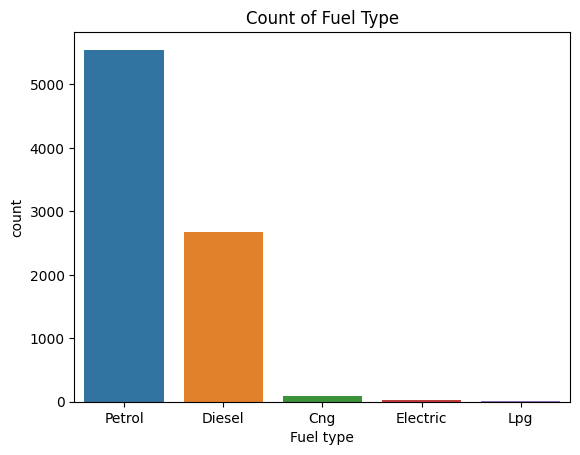

In [23]:
# visualizing the counts of fuel type
plt.title("count of Fuel type")
# Aggregate the data
fuel_counts = df["Fuel type"].value_counts().reset_index()
fuel_counts.columns = ['Fuel type', 'count']

# Plot
plt.title("Count of Fuel Type")
sns.barplot(y='count', x='Fuel type', data=fuel_counts)


In [24]:
df["body type"].unique()

array(['Hatchback', 'SUV', 'Sedan', 'MUV', 'Coupe', 'Minivans',
       'Pickup Trucks', 'Convertibles', 'Hybrids', 'Wagon'], dtype=object)

In [25]:
df["body type"].value_counts()

body type
Hatchback        3563
SUV              2222
Sedan            2171
MUV               353
Minivans           26
Coupe              10
Pickup Trucks       6
Convertibles        6
Hybrids             1
Wagon               1
Name: count, dtype: int64

<Axes: title={'center': 'count of body type'}, xlabel='body type', ylabel='count'>

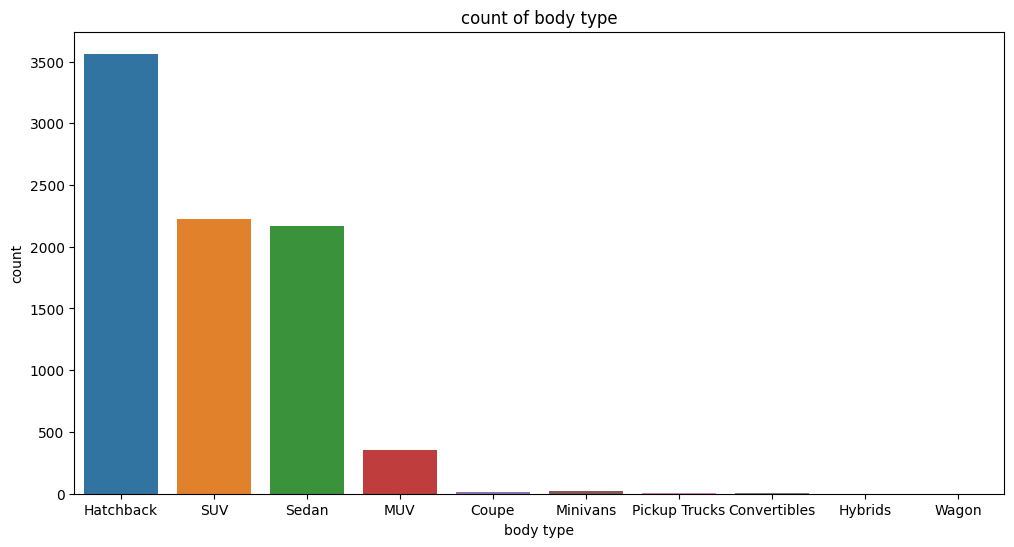

In [26]:
# visual the count of body type
plt.figure(figsize=(12,6))
plt.title("count of body type")
sns.countplot(x=df["body type"], data=df)

<Figure size 1200x600 with 0 Axes>

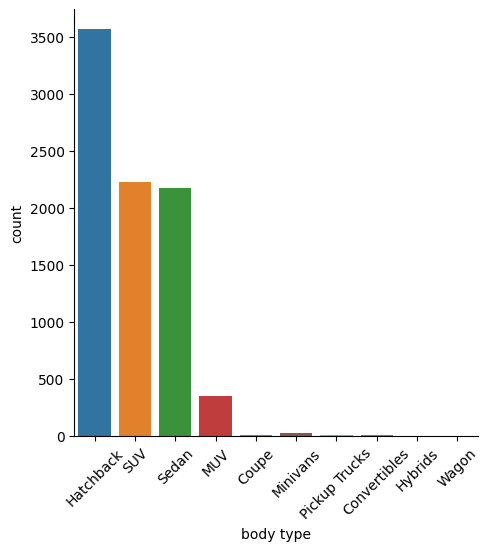

In [27]:
plt.figure(figsize = (12, 6))
sns.catplot(x = 'body type', data = df, kind = 'count')
plt.xticks(rotation = 45)
plt.show()

In [28]:
df["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [29]:
df["transmission"].value_counts()

transmission
Manual       6046
Automatic    2313
Name: count, dtype: int64

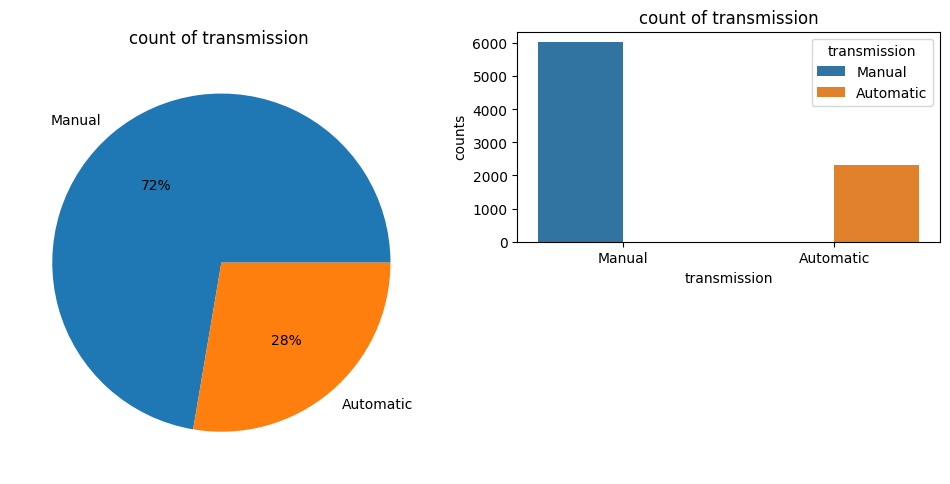

In [30]:
# visualizing the count of transmission
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("count of transmission ")
plt.pie(df["transmission"].value_counts(),autopct="%1.0f%%",labels=['Manual','Automatic'])
plt.subplot(2,2,2)
sns.countplot(x=df["transmission"],data=df,hue="transmission")
plt.xlabel("transmission")
plt.ylabel("counts")
plt.title("count of transmission")
plt.show()

In [31]:
df["Brand"].unique()

array(['Maruti', 'Ford', 'Tata', 'Hyundai', 'Jeep', 'Datsun', 'Honda',
       'Mahindra', 'Mercedes-Benz', 'BMW', 'Renault', 'Audi', 'Toyota',
       'Mini', 'Kia', 'Skoda', 'Volkswagen', 'Volvo', 'MG', 'Nissan',
       'Fiat', 'Mahindra Ssangyong', 'Mitsubishi', 'Jaguar', 'Land Rover',
       'Chevrolet', 'Citroen', 'Opel', 'Mahindra Renault', 'Isuzu',
       'Lexus', 'Porsche', 'Hindustan Motors'], dtype=object)

In [32]:
df["Brand"].value_counts()

Brand
Maruti                2248
Hyundai               1651
Honda                  864
Tata                   430
Mahindra               376
Toyota                 325
Renault                311
Ford                   311
Volkswagen             294
Mercedes-Benz          244
BMW                    184
Skoda                  160
Kia                    158
Audi                   156
Jeep                   112
MG                      90
Nissan                  78
Chevrolet               76
Datsun                  74
Land Rover              44
Volvo                   41
Jaguar                  35
Fiat                    31
Mitsubishi              14
Mini                    12
Citroen                  8
Porsche                  6
Lexus                    5
Mahindra Renault         5
Isuzu                    5
Mahindra Ssangyong       4
Hindustan Motors         4
Opel                     3
Name: count, dtype: int64

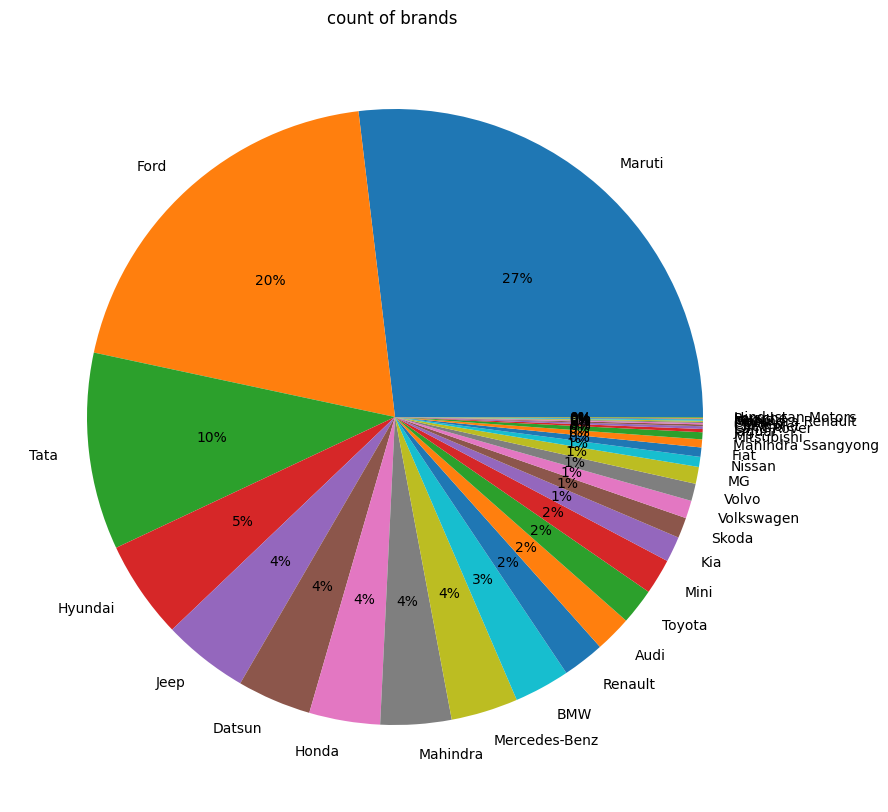

In [33]:
plt.figure(figsize=(25,10))
plt.title("count of brands ")
plt.pie(df["Brand"].value_counts(),autopct="%1.0f%%",labels=[ 'Maruti', 'Ford', 'Tata', 'Hyundai', 'Jeep', 'Datsun', 'Honda',
       'Mahindra', 'Mercedes-Benz', 'BMW', 'Renault', 'Audi', 'Toyota',
       'Mini', 'Kia', 'Skoda', 'Volkswagen', 'Volvo','MG', 'Nissan',
       'Fiat', 'Mahindra Ssangyong', 'Mitsubishi', 'Jaguar', 'Land Rover',
       'Chevrolet', 'Citroen', 'Opel', 'Mahindra Renault', 'Isuzu',
       'Lexus', 'Porsche', 'Hindustan Motors'])
plt.show()

##### From Fiat all the car percentages are 0%

In [34]:
df["Color"].unique()

array(['White', 'Red', 'Others', 'Gray', 'Grey', 'Maroon', 'Orange',
       'Silver', 'Blue', 'Brown', 'Yellow', 'Black', 'Golden', 'Green',
       'O Purple', 'Other', 'Gold', 'TITANIUM GREY', 'Violet',
       'MODERN STEEL METALLIC', 'PLATINUM WHITE', 'Golden Brown',
       'Aurora Black Pearl', 'Beige', 'Star Dust', 'Flash Red', 'Purple',
       'PLATINUM WHITE PEARL', 'Wine Red', 'Taffeta White',
       'Minimal Grey', 'Fiery Red', 'T Wine', 'Prime Star Gaze',
       'TAFETA WHITE', 'P Black', 'Golden brown', 'METALL',
       'MET ECRU BEIGE', 'COPPER', 'TITANIUM', 'CHILL', 'Burgundy',
       'Lunar Silver Metallic', 'SILKY SILVER', 'BERRY RED',
       'PREMIUM AMBER METALLIC', 'R EARTH', 'PLATINUM SILVER',
       'ORCHID WHITE PEARL', 'CARNELIAN RED PEARL', 'POLAR WHITE',
       'BEIGE', 'Medium Blue', 'Alabaster Silver Metallic',
       'Carbon Steel', 'Cavern Grey', 'ESPRESO_BRWN', 'Pearl White',
       'Polar White', 'Magma Grey', 'Dark Red', 'Falsa Colour', 'Cherry',
       'H

In [35]:
df["modelYear"].unique()

array([2015, 2018, 2014, 2020, 2017, 2021, 2019, 2022, 2016, 2011, 2009,
       2013, 2010, 2008, 2006, 2012, 2005, 2007, 2023, 1998, 2004, 2003,
       2001, 2002, 2000, 1985, 1997, 1999], dtype=int64)

In [36]:
df["Insurance Validity"].unique()

array(['Third Party insurance', 'Comprehensive', 'Third Party',
       'Zero Dep', '2', '1', 'Not Available'], dtype=object)

In [37]:
df["Insurance Validity"].value_counts()

Insurance Validity
Third Party insurance    4051
Comprehensive            3150
Third Party               630
Zero Dep                  303
Not Available             221
1                           3
2                           1
Name: count, dtype: int64

In [38]:
df["body type"].unique()

array(['Hatchback', 'SUV', 'Sedan', 'MUV', 'Coupe', 'Minivans',
       'Pickup Trucks', 'Convertibles', 'Hybrids', 'Wagon'], dtype=object)

In [39]:
# check seats with respect to body type
print(f'Hatchback: {df[df["body type"]=="Hatchback"]["Seats"].unique()}')
print(f'SUV: {df[df["body type"]=="SUV"]["Seats"].unique()}')
print(f'Sedan: {df[df["body type"]=="Sedan"]["Seats"].unique()}')
print(f'MUV: {df[df["body type"]=="MUV"]["Seats"].unique()}')
print(f'Coupe: {df[df["body type"]=="Coupe"]["Seats"].unique()}')
print(f'Minivans: {df[df["body type"]=="Minivans"]["Seats"].unique()}')
print(f'Convertibles: {df[df["body type"]=="Convertibles"]["Seats"].unique()}')
print(f'Hybrids: {df[df["body type"]=="Hybrids"]["Seats"].unique()}')
print(f'Wagon: {df[df["body type"]=="Wagon"]["Seats"].unique()}')
print(f'MPickup Trucks: {df[df["body type"]=="Pickup Trucks"]["Seats"].unique()}')

Hatchback: [5 4 6]
SUV: [ 5  7  6  8  4  9 10]
Sedan: [5 4]
MUV: [ 7  8 10  6  5]
Coupe: [5 4 2]
Minivans: [5 7 8]
Convertibles: [4 2]
Hybrids: [4]
Wagon: [5]
MPickup Trucks: [5 2]


In [40]:
# Check for duplicate rows
duplicates = df.duplicated()
duplicates
# Show duplicate rows
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
79,Petrol,Hatchback,Manual,2,Maruti,Maruti Ritz,2014,4.20,Third Party insurance,60000,18.500000,5,Silver,Bangalore
113,Petrol,SUV,Automatic,1,Hyundai,Hyundai Venue,2019,12.50,Third Party insurance,20000,18.150000,5,Others,Bangalore
121,Petrol,Hatchback,Manual,3,Hyundai,Hyundai i10,2009,2.49,Third Party insurance,80000,20.360000,5,Others,Bangalore
180,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,23.100000,5,White,Bangalore
194,Petrol,Sedan,Manual,1,Fiat,Fiat Linea,2009,3.75,Third Party insurance,50000,16.000000,5,Gray,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8202,Petrol,Sedan,Automatic,1,Volkswagen,Volkswagen Vento,2017,6.50,Comprehensive,54000,18.190000,5,Grey,Kolkata
8254,Petrol,SUV,Automatic,1,Hyundai,Hyundai Venue,2021,9.50,Comprehensive,29000,18.150000,5,White,Kolkata
8287,Petrol,MUV,Manual,1,Kia,Kia Carens,2022,10.99,Comprehensive,20000,19.245568,7,White,Kolkata
8329,Petrol,Hatchback,Manual,1,Maruti,Maruti Swift,2021,6.50,Third Party insurance,10000,21.210000,5,Others,Kolkata


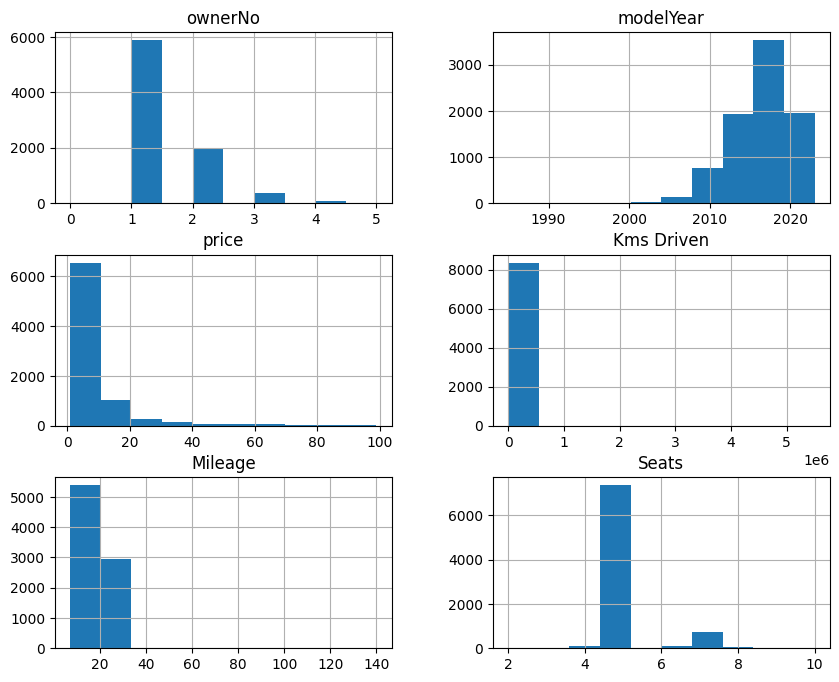

In [41]:
df.hist(figsize=(10,8))
plt.show()

<Figure size 1000x600 with 0 Axes>

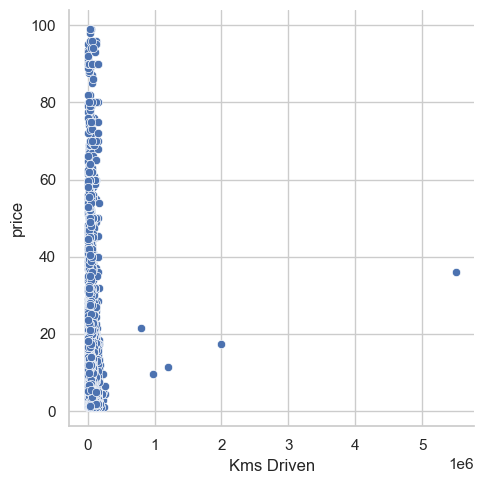

In [42]:
plt.figure(figsize = (10,6))
sns.set(style='whitegrid')
sns.relplot(x = 'Kms Driven', y = 'price', data = df, kind = 'scatter')
plt.show()


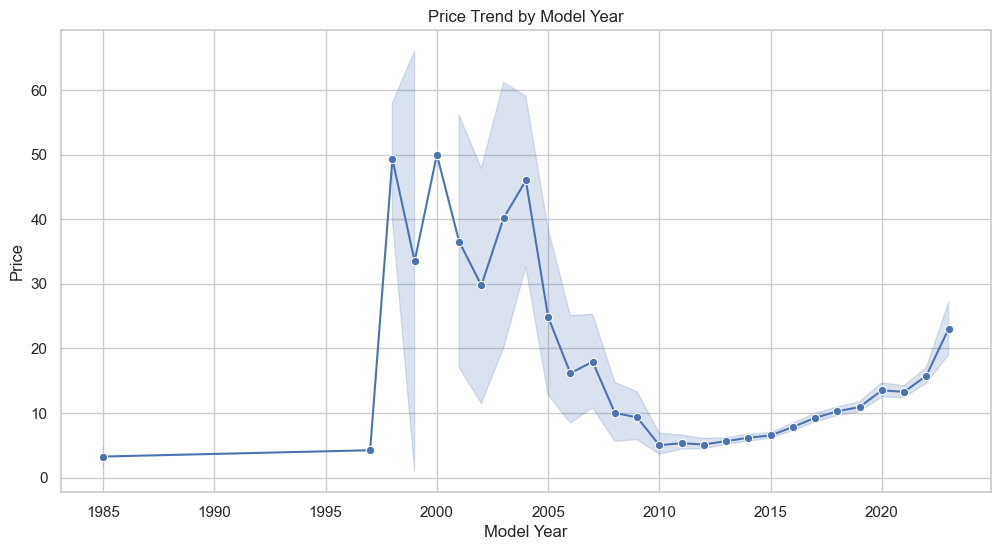

In [43]:
plt.figure(figsize=(12, 6))
plt.title("Price Trend by Model Year")
sns.set(style='whitegrid')
sns.lineplot(x='modelYear', y='price', data=df, marker='o')
plt.xlabel("Model Year")
plt.ylabel("Price")
plt.show()

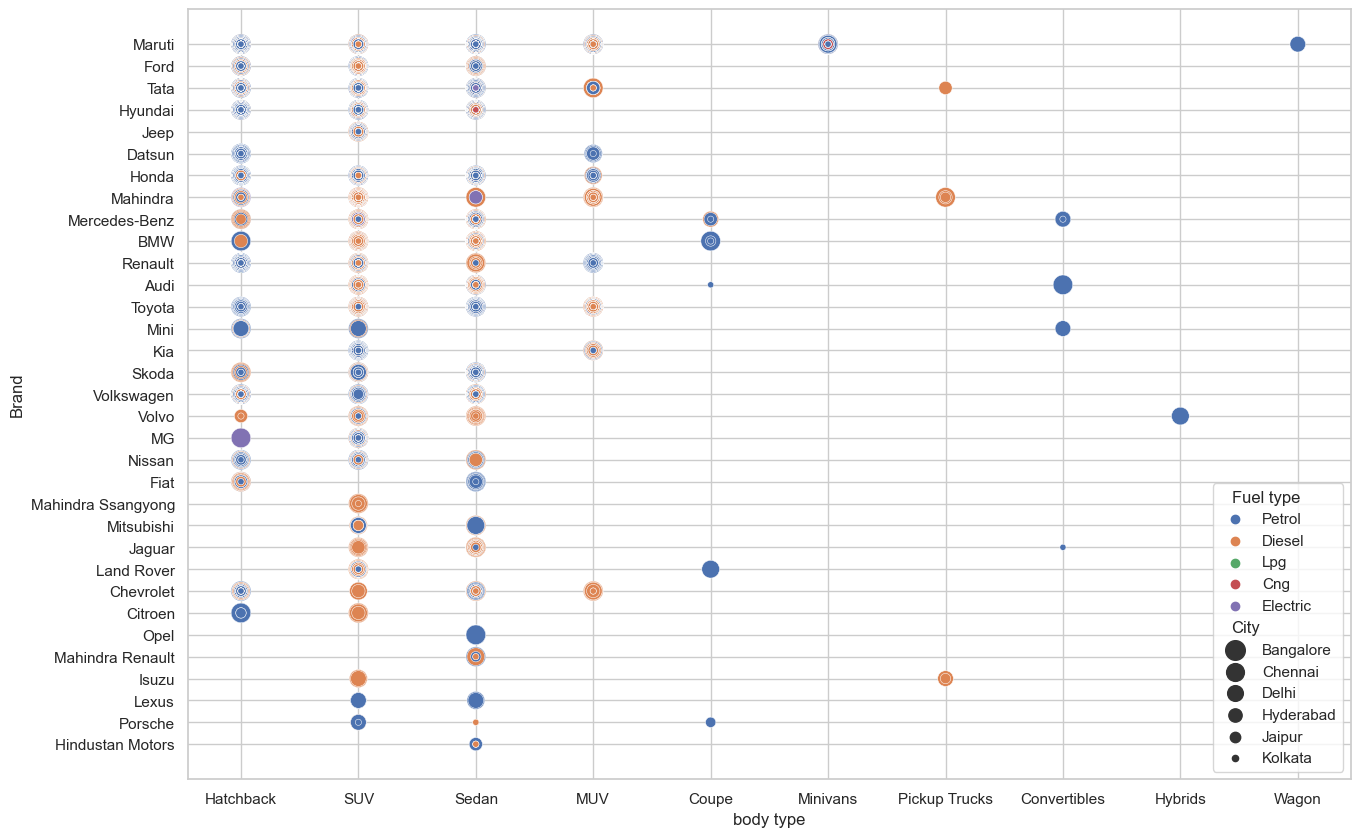

In [44]:

plt.figure(figsize=(15,10))
sns.scatterplot(x = 'body type', y='Brand', hue="Fuel type", size = 'City', sizes = (20, 200), data=df)
#plt.yticks(rotation = 45)
plt.show()


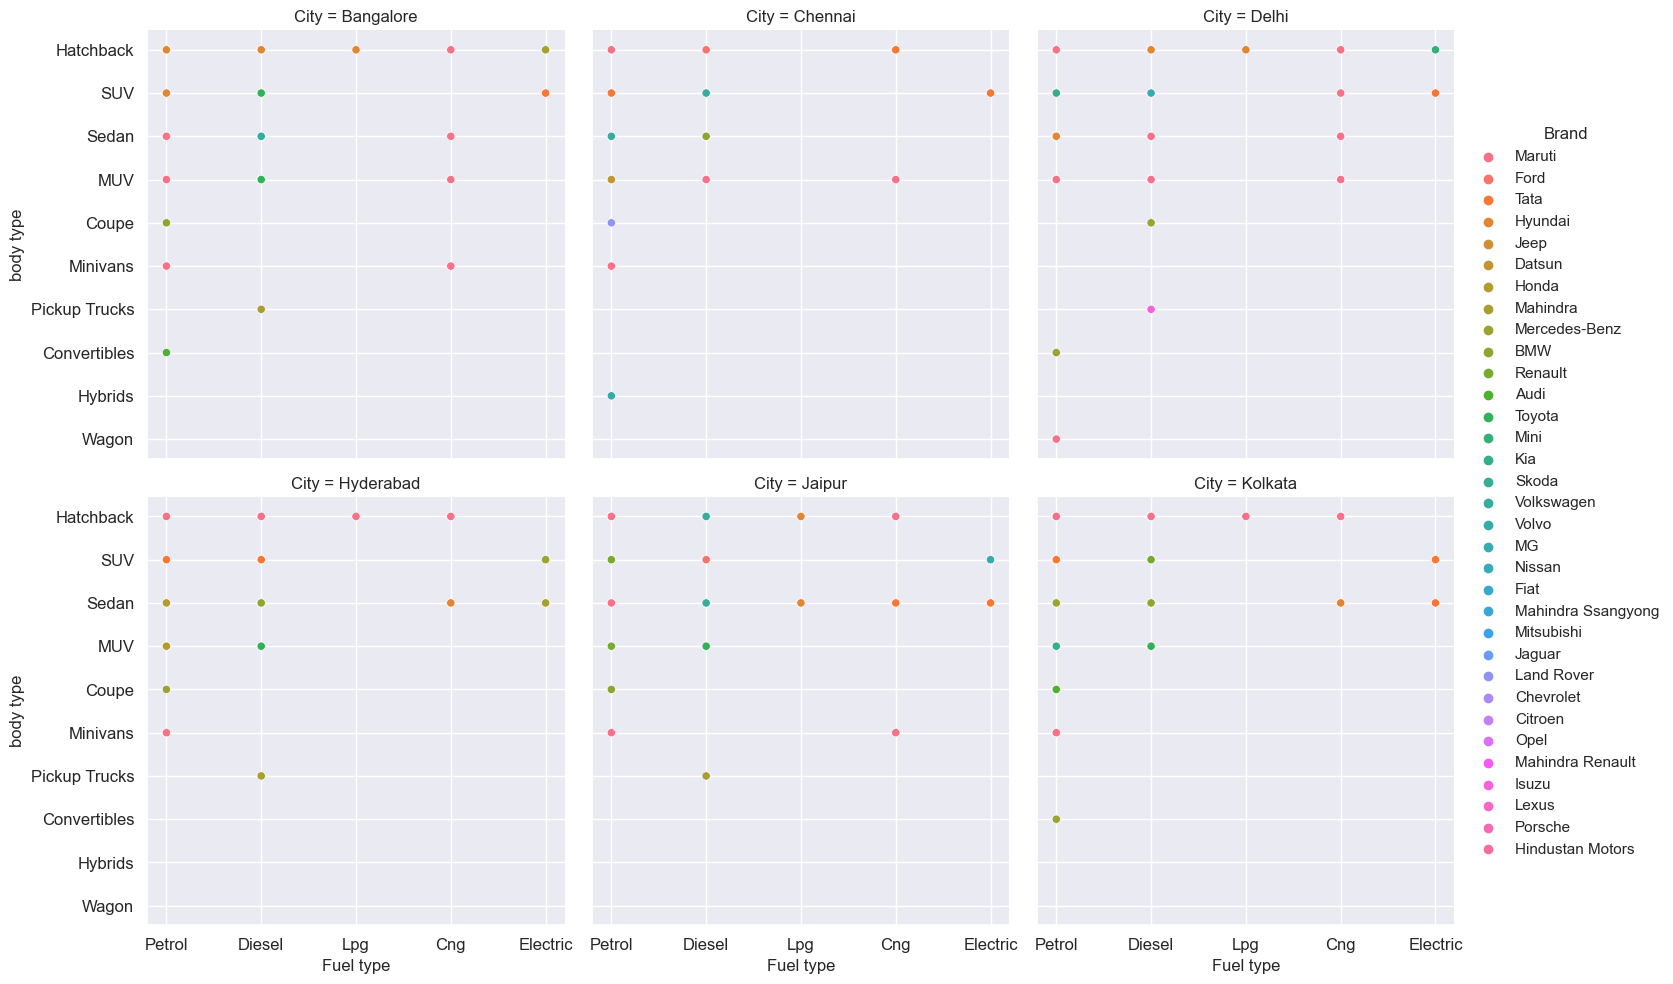

In [45]:

sns.set(rc={'xtick.labelsize': 12, 'ytick.labelsize':12, 'axes.labelsize':12})
sns.relplot(x = 'Fuel type', y = 'body type', hue = 'Brand', col='City', col_wrap=3, data=df)
plt.show()

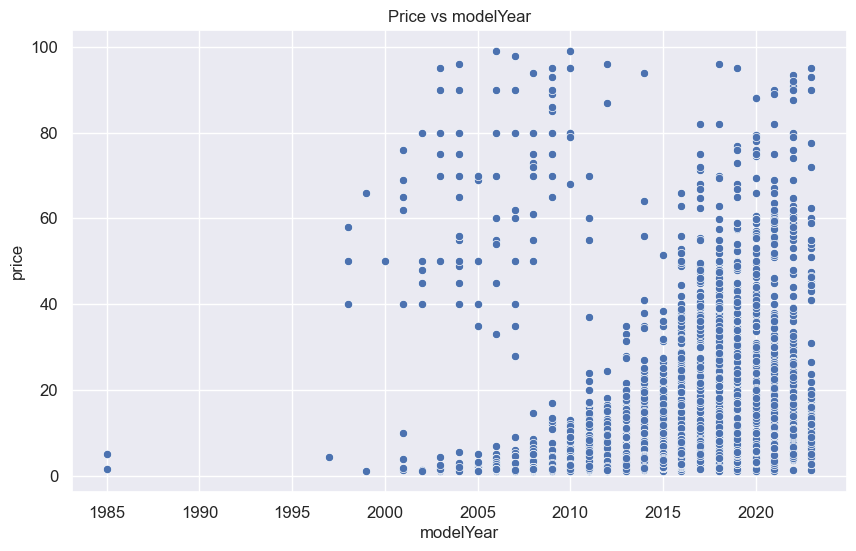

In [46]:
plt.figure(figsize=(10, 6))
plt.title("Price vs modelYear")
sns.scatterplot(y='price', x='modelYear', data=df)
plt.xlabel("modelYear")
plt.ylabel("price")
plt.show()

<Axes: xlabel='body type', ylabel='price'>

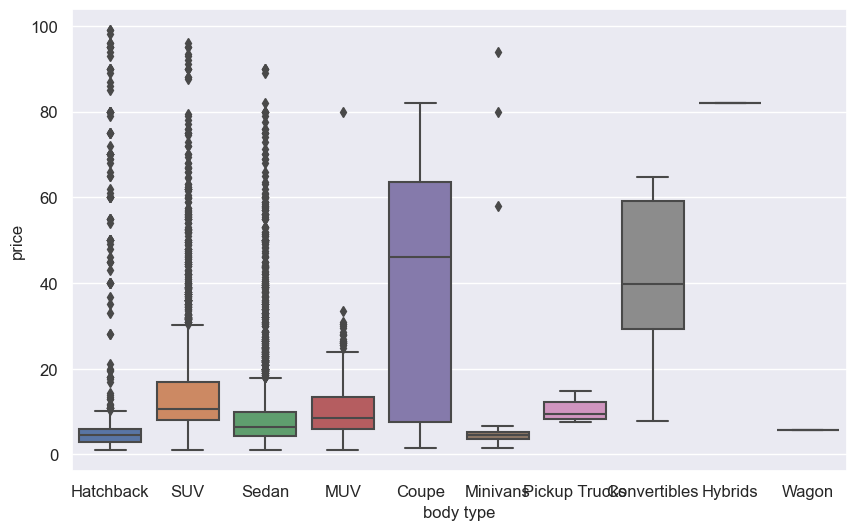

In [47]:
plt.figure(figsize=(10,6))
sns.boxplot(x='body type', y='price', data=df)

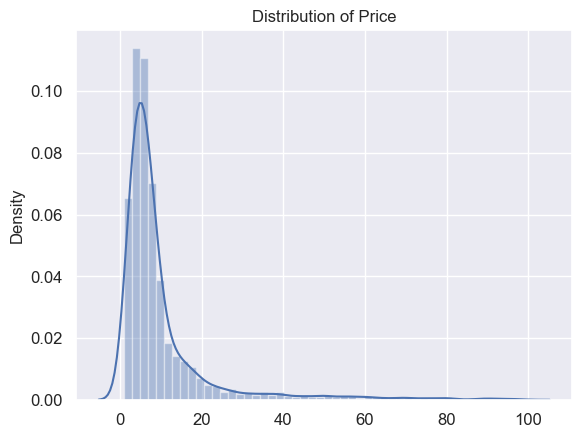

In [48]:
#distribution before outliers removing
sns.distplot(x=df["price"], kde=True)
plt.title("Distribution of Price")
plt.show()

In [49]:
df.dtypes

Fuel type              object
body type              object
transmission           object
ownerNo                 int64
Brand                  object
model                  object
modelYear               int64
price                 float64
Insurance Validity     object
Kms Driven              int32
Mileage               float64
Seats                   int32
Color                  object
City                   object
dtype: object

In [50]:
df.columns

Index(['Fuel type', 'body type', 'transmission', 'ownerNo', 'Brand', 'model',
       'modelYear', 'price', 'Insurance Validity', 'Kms Driven', 'Mileage',
       'Seats', 'Color', 'City'],
      dtype='object')

In [51]:
numerical_col = ['modelYear', 'price','Kms Driven', 'Mileage','Seats']

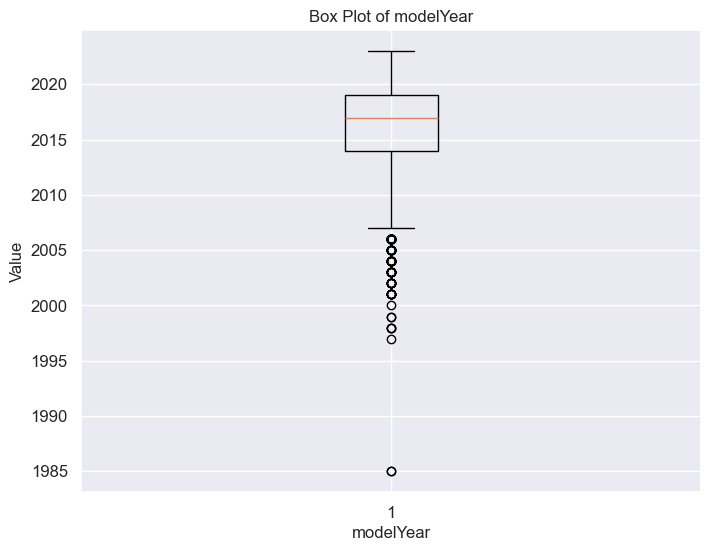

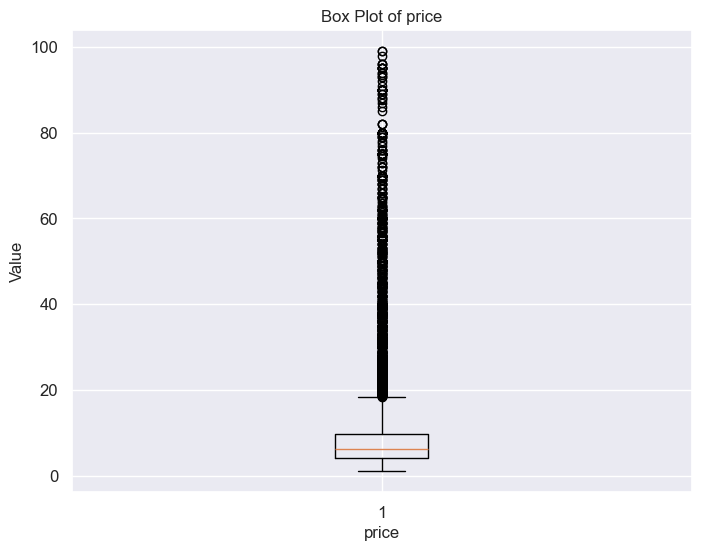

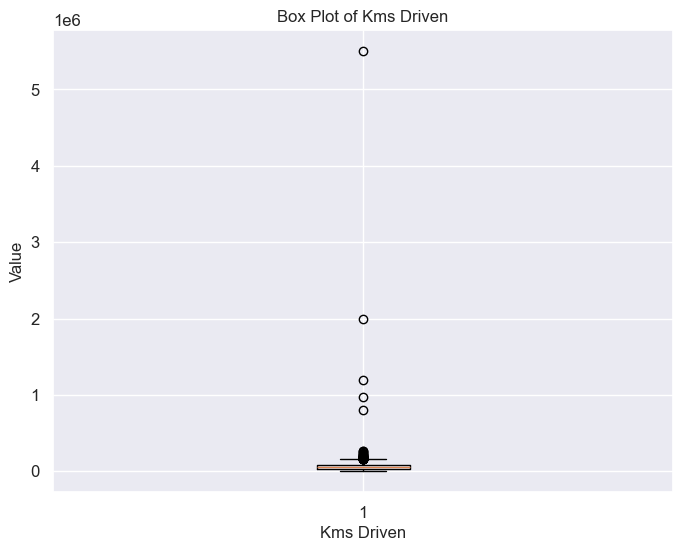

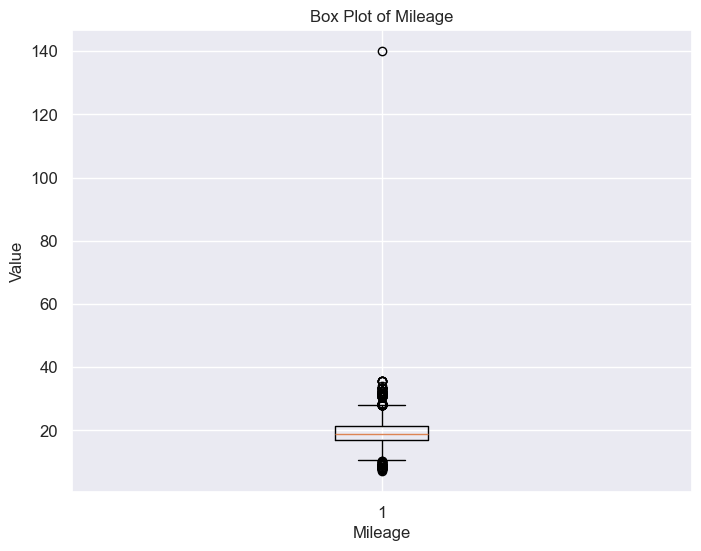

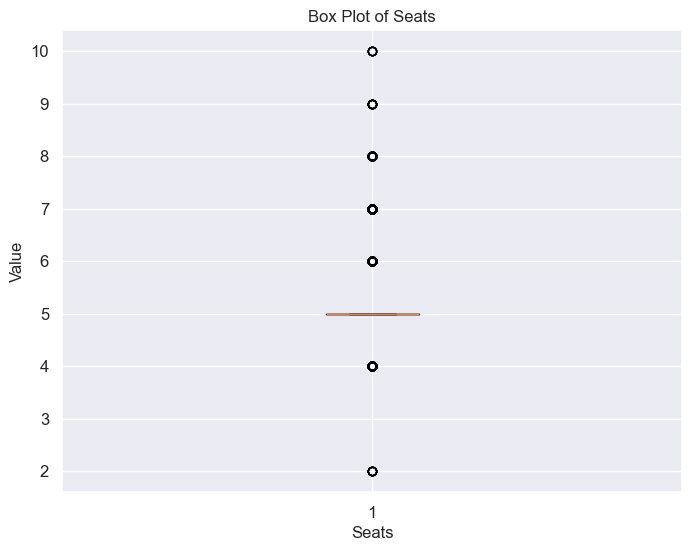

In [52]:
for column in numerical_col:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

In [53]:
df

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,23.10,5,White,Bangalore
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706,17.00,5,White,Bangalore
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,5.85,Comprehensive,11949,23.84,5,Red,Bangalore
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794,19.10,5,Others,Bangalore
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000,23.65,5,Gray,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8354,Petrol,Hatchback,Manual,1,Maruti,Maruti Celerio,2022,5.10,Third Party insurance,10000,25.24,5,Others,Kolkata
8355,Petrol,Hatchback,Manual,1,Maruti,Maruti Alto 800,2014,1.80,Third Party insurance,120000,22.74,5,Others,Kolkata
8356,Petrol,Sedan,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,5.50,Third Party insurance,50000,11.74,5,Others,Kolkata
8357,Petrol,Hatchback,Manual,1,Maruti,Maruti Ritz,2012,1.40,Third Party insurance,40000,18.50,5,Others,Kolkata


In [54]:
#convert dataframe to csv
df.to_csv("df.csv",index=False)

### Detecting and Handling Outliers

In [55]:
# Removing outliers from the 'price' column using IQR method
# Calculate Q1, Q3, and IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Finding lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers from DataFrame
df_cleaned = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

# Count of lower outliers
low_outliers = len(df[df['price'] < (Q1 - 1.5 * IQR)])

# Count of upper outliers
high_outliers = len(df[df['price'] > (Q3 + 1.5 * IQR)])

# Print outlier counts
print(f"Value of lower bound: {lower_bound}")
print(f"Value of upper bound: {upper_bound}")
print(f"Count of lower outliers: {low_outliers}")
print(f"Count of upper outliers: {high_outliers}")

Value of lower bound: -4.625
Value of upper bound: 18.375
Count of lower outliers: 0
Count of upper outliers: 919


In [56]:
df_cleaned.reset_index(inplace=True,drop=True)
df_cleaned

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,23.10,5,White,Bangalore
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706,17.00,5,White,Bangalore
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,5.85,Comprehensive,11949,23.84,5,Red,Bangalore
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794,19.10,5,Others,Bangalore
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000,23.65,5,Gray,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,Petrol,Hatchback,Manual,1,Maruti,Maruti Celerio,2022,5.10,Third Party insurance,10000,25.24,5,Others,Kolkata
7436,Petrol,Hatchback,Manual,1,Maruti,Maruti Alto 800,2014,1.80,Third Party insurance,120000,22.74,5,Others,Kolkata
7437,Petrol,Sedan,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,5.50,Third Party insurance,50000,11.74,5,Others,Kolkata
7438,Petrol,Hatchback,Manual,1,Maruti,Maruti Ritz,2012,1.40,Third Party insurance,40000,18.50,5,Others,Kolkata


In [57]:
max_price_index = df_cleaned["price"].idxmax()
max_price_row = df_cleaned.loc[max_price_index]
print(max_price_row)

Fuel type                     Diesel
body type                        SUV
transmission               Automatic
ownerNo                            1
Brand                        Hyundai
model                 Hyundai Tucson
modelYear                       2017
price                          18.25
Insurance Validity     Comprehensive
Kms Driven                     57000
Mileage                        16.38
Seats                              5
Color                          White
City                       Bangalore
Name: 112, dtype: object


In [58]:
#convert dataframe to csv
df_cleaned.to_csv("final.csv",index=False)

In [73]:
df = pd.read_csv("final.csv")
df.head()

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Seats,Color,City
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,23.10,5,White,Bangalore
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706,17.00,5,White,Bangalore
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,5.85,Comprehensive,11949,23.84,5,Red,Bangalore
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794,19.10,5,Others,Bangalore
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000,23.65,5,Gray,Bangalore


### Encoding

In [60]:
# creating a list to hold name of the categorical columns
cat_col=df_cleaned.select_dtypes(include="object").columns.to_list()
cat_col

['Fuel type',
 'body type',
 'transmission',
 'Brand',
 'model',
 'Insurance Validity',
 'Color',
 'City']

In [61]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False,handle_unknown="ignore")
encoder.fit(df_cleaned[cat_col])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [62]:
encoder.categories_

[array(['Cng', 'Diesel', 'Electric', 'Lpg', 'Petrol'], dtype=object),
 array(['Convertibles', 'Coupe', 'Hatchback', 'MUV', 'Minivans',
        'Pickup Trucks', 'SUV', 'Sedan', 'Wagon'], dtype=object),
 array(['Automatic', 'Manual'], dtype=object),
 array(['Audi', 'BMW', 'Chevrolet', 'Citroen', 'Datsun', 'Fiat', 'Ford',
        'Hindustan Motors', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep',
        'Kia', 'Land Rover', 'MG', 'Mahindra', 'Mahindra Renault',
        'Mahindra Ssangyong', 'Maruti', 'Mercedes-Benz', 'Mini',
        'Mitsubishi', 'Nissan', 'Porsche', 'Renault', 'Skoda', 'Tata',
        'Toyota', 'Volkswagen', 'Volvo'], dtype=object),
 array(['Ambassador', 'Audi A3', 'Audi A4', 'Audi A6', 'Audi Q3',
        'Audi Q5', 'Audi Q7', 'BMW 1 Series', 'BMW 3 Series',
        'BMW 3 Series GT', 'BMW 5 Series', 'BMW 6 Series', 'BMW 7 Series',
        'BMW X1', 'BMW X3', 'BMW X5', 'BMW X7', 'Chevrolet Aveo',
        'Chevrolet Beat', 'Chevrolet Captiva', 'Chevrolet Cruze',
        '

In [63]:
#list of new column
new_encoded_col= list(encoder.get_feature_names_out(cat_col))
new_encoded_col

['Fuel type_Cng',
 'Fuel type_Diesel',
 'Fuel type_Electric',
 'Fuel type_Lpg',
 'Fuel type_Petrol',
 'body type_Convertibles',
 'body type_Coupe',
 'body type_Hatchback',
 'body type_MUV',
 'body type_Minivans',
 'body type_Pickup Trucks',
 'body type_SUV',
 'body type_Sedan',
 'body type_Wagon',
 'transmission_Automatic',
 'transmission_Manual',
 'Brand_Audi',
 'Brand_BMW',
 'Brand_Chevrolet',
 'Brand_Citroen',
 'Brand_Datsun',
 'Brand_Fiat',
 'Brand_Ford',
 'Brand_Hindustan Motors',
 'Brand_Honda',
 'Brand_Hyundai',
 'Brand_Isuzu',
 'Brand_Jaguar',
 'Brand_Jeep',
 'Brand_Kia',
 'Brand_Land Rover',
 'Brand_MG',
 'Brand_Mahindra',
 'Brand_Mahindra Renault',
 'Brand_Mahindra Ssangyong',
 'Brand_Maruti',
 'Brand_Mercedes-Benz',
 'Brand_Mini',
 'Brand_Mitsubishi',
 'Brand_Nissan',
 'Brand_Porsche',
 'Brand_Renault',
 'Brand_Skoda',
 'Brand_Tata',
 'Brand_Toyota',
 'Brand_Volkswagen',
 'Brand_Volvo',
 'model_Ambassador',
 'model_Audi A3',
 'model_Audi A4',
 'model_Audi A6',
 'model_Audi Q

In [64]:
# transforming the data
df_cleaned[new_encoded_col]=encoder.transform(df_cleaned[cat_col])
df_cleaned.head()

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Validity,Kms Driven,...,Color_golden brown,Color_m grey,Color_magma gray,Color_urban titanim,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,120000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,32706,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,5.85,Comprehensive,11949,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,17794,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,60000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [65]:
# drop the unwanted columns
df_cleaned.drop(columns=cat_col,inplace=True)
df_cleaned

,ownerNo,modelYear,price,Kms Driven,Mileage,Seats,Fuel type_Cng,Fuel type_Diesel,Fuel type_Electric,Fuel type_Lpg,...,Color_golden brown,Color_m grey,Color_magma gray,Color_urban titanim,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
0,3,2015,4.00,120000,23.10,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,2018,8.11,32706,17.00,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,2018,5.85,11949,23.84,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,2014,4.62,17794,19.10,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,2015,7.90,60000,23.65,5,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,1,2022,5.10,10000,25.24,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7436,1,2014,1.80,120000,22.74,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7437,3,2011,5.50,50000,11.74,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7438,1,2012,1.40,40000,18.50,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [66]:
with open('encoder.pkl','wb') as file:
    pickle.dump(encoder,file)

In [67]:
object_columns = df_cleaned.select_dtypes(include='object').columns.tolist()
print(object_columns)


[]


In [68]:
#convert dataframe to csv

df_cleaned.to_csv("df_cleaned1.csv",index=False)

### Scaling

In [69]:
x=df_cleaned.drop(columns=["price"],axis=1)
y=df_cleaned["price"]

In [70]:
# scaling the data with standardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(x)

In [71]:
import pickle
with open('std_scale.pkl','wb') as f:
    pickle.dump(scaled,f)

In [72]:
#convert dataframe to csv

df_cleaned.to_csv("data_final.csv",index=False)